In [1]:
import netCDF4 as nc
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import xarray as xr
import os
import datetime as dt
from pylab import *
from mpl_toolkits.basemap import Basemap

In [2]:
pip install mpl_toolkits.basemap

Note: you may need to restart the kernel to use updated packages.


ERROR: Could not find a version that satisfies the requirement mpl_toolkits.basemap (from versions: none)
ERROR: No matching distribution found for mpl_toolkits.basemap


In [3]:
ds = xr.open_mfdataset('..//WILDFIRE-DATA-ANALYSIS//data//*2019.nc')
print(ds)


<xarray.Dataset>
Dimensions:                          (time: 12, lat: 720, lon: 1440,
                                      vegetation_class: 18, bounds: 2)
Coordinates:
  * lat                              (lat) float64 89.88 89.62 ... -89.62 -89.88
  * lon                              (lon) float64 -179.9 -179.6 ... 179.6 179.9
  * time                             (time) datetime64[ns] 2019-01-01 ... 201...
  * vegetation_class                 (vegetation_class) int32 -2147483647 ......
Dimensions without coordinates: bounds
Data variables:
    burned_area                      (time, lat, lon) float32 dask.array<chunksize=(1, 720, 1440), meta=np.ndarray>
    standard_error                   (time, lat, lon) float32 dask.array<chunksize=(1, 720, 1440), meta=np.ndarray>
    fraction_of_burnable_area        (time, lat, lon) float32 dask.array<chunksize=(1, 720, 1440), meta=np.ndarray>
    fraction_of_observed_area        (time, lat, lon) float32 dask.array<chunksize=(1, 720, 1440), meta

In [4]:
##'burned_area', 'standard_error', 'fraction_of_burnable_area', 'fraction_of_observed_area','number_of_patches','burned_area_in_vegetation_class', 
## 'lat', 'lat_bounds', 'lon', 'time', 'time_bounds','vegetation_class_name'

In [5]:
ds.data_vars

Data variables:
    burned_area                      (time, lat, lon) float32 dask.array<chunksize=(1, 720, 1440), meta=np.ndarray>
    standard_error                   (time, lat, lon) float32 dask.array<chunksize=(1, 720, 1440), meta=np.ndarray>
    fraction_of_burnable_area        (time, lat, lon) float32 dask.array<chunksize=(1, 720, 1440), meta=np.ndarray>
    fraction_of_observed_area        (time, lat, lon) float32 dask.array<chunksize=(1, 720, 1440), meta=np.ndarray>
    number_of_patches                (time, lat, lon) float32 dask.array<chunksize=(1, 720, 1440), meta=np.ndarray>
    burned_area_in_vegetation_class  (time, vegetation_class, lat, lon) float32 dask.array<chunksize=(1, 18, 720, 1440), meta=np.ndarray>
    lat_bounds                       (time, lat, bounds) float64 dask.array<chunksize=(1, 720, 2), meta=np.ndarray>
    lon_bounds                       (time, lon, bounds) float64 dask.array<chunksize=(1, 1440, 2), meta=np.ndarray>
    time_bounds                  

In [6]:
latbounds = [22.464,22.123]
lonbounds = [102.377,102.809]
lats = ds.burned_area["lat"][:]
lons = ds.burned_area["lon"][:]
lat_inds = np.where((lats > latbounds[0]) & (lats < latbounds[1]))
lon_inds = np.where((lons > lonbounds[0]) & (lons < lonbounds[1]))


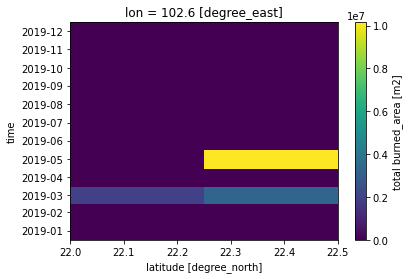

In [7]:
total_bunred_area_vs_time  = ds.burned_area.sel(lat=slice(*latbounds), lon=slice(*lonbounds))
total_bunred_area_vs_time.plot()

In [8]:
 tb = total_bunred_area_vs_time.to_dataframe()
 tb

burned_area
time       lat    lon                 
2019-01-01 22.375 102.625          0.0
           22.125 102.625          0.0
2019-02-01 22.375 102.625          0.0
           22.125 102.625          0.0
2019-03-01 22.375 102.625    3273544.0
           22.125 102.625    1931928.0
2019-03-31 22.375 102.625          0.0
           22.125 102.625          0.0
2019-04-30 22.375 102.625   10142622.0
           22.125 102.625          0.0
2019-05-31 22.375 102.625          0.0
           22.125 102.625          0.0
2019-06-30 22.375 102.625          0.0
           22.125 102.625          0.0
2019-07-31 22.375 102.625          0.0
           22.125 102.625          0.0
2019-08-31 22.375 102.625          0.0
           22.125 102.625          0.0
2019-09-30 22.375 102.625          0.0
           22.125 102.625          0.0
2019-11-01 22.375 102.625          0.0
           22.125 102.625          0.0
2019-12-01 22.375 102.625          0.0
           22.125 102.625          0.0

In [9]:
ds.standard_error

<xarray.DataArray 'standard_error' (time: 12, lat: 720, lon: 1440)>
dask.array<concatenate, shape=(12, 720, 1440), dtype=float32, chunksize=(1, 720, 1440), chunktype=numpy.ndarray>
Coordinates:
  * lat      (lat) float64 89.88 89.62 89.38 89.12 ... -89.38 -89.62 -89.88
  * lon      (lon) float64 -179.9 -179.6 -179.4 -179.1 ... 179.4 179.6 179.9
  * time     (time) datetime64[ns] 2019-01-01 2019-02-01 ... 2019-12-01
Attributes:
    long_name:  standard error of the estimation of burned area
    units:      m2

In [10]:
standard_error_vs_time  = ds.standard_error.sel(lat=slice(*latbounds), lon=slice(*lonbounds))

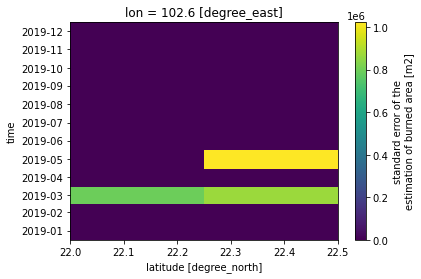

In [11]:

standard_error_vs_time.plot()

In [12]:
ds.fraction_of_burnable_area

<xarray.DataArray 'fraction_of_burnable_area' (time: 12, lat: 720, lon: 1440)>
dask.array<concatenate, shape=(12, 720, 1440), dtype=float32, chunksize=(1, 720, 1440), chunktype=numpy.ndarray>
Coordinates:
  * lat      (lat) float64 89.88 89.62 89.38 89.12 ... -89.38 -89.62 -89.88
  * lon      (lon) float64 -179.9 -179.6 -179.4 -179.1 ... 179.4 179.6 179.9
  * time     (time) datetime64[ns] 2019-01-01 2019-02-01 ... 2019-12-01
Attributes:
    long_name:  fraction of burnable area
    units:      1
    comment:    The fraction of burnable area is the fraction of the cell tha...

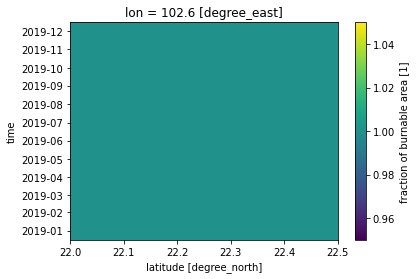

In [13]:
fraction_of_burnable_area_vs_time =  ds.fraction_of_burnable_area.sel(lat=slice(*latbounds), lon=slice(*lonbounds))
fraction_of_burnable_area_vs_time.plot()

In [14]:
ds.fraction_of_observed_area 

<xarray.DataArray 'fraction_of_observed_area' (time: 12, lat: 720, lon: 1440)>
dask.array<concatenate, shape=(12, 720, 1440), dtype=float32, chunksize=(1, 720, 1440), chunktype=numpy.ndarray>
Coordinates:
  * lat      (lat) float64 89.88 89.62 89.38 89.12 ... -89.38 -89.62 -89.88
  * lon      (lon) float64 -179.9 -179.6 -179.4 -179.1 ... 179.4 179.6 179.9
  * time     (time) datetime64[ns] 2019-01-01 2019-02-01 ... 2019-12-01
Attributes:
    long_name:  fraction of observed area
    units:      1
    comment:    The fraction of the total burnable area in the cell (fraction...

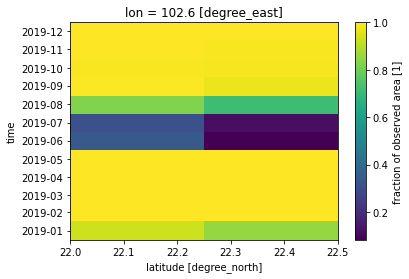

In [15]:
fraction_of_observed_area_vs_time =  ds.fraction_of_observed_area.sel(lat=slice(*latbounds), lon=slice(*lonbounds))
fraction_of_observed_area_vs_time.plot()

In [16]:
ds.number_of_patches

<xarray.DataArray 'number_of_patches' (time: 12, lat: 720, lon: 1440)>
dask.array<concatenate, shape=(12, 720, 1440), dtype=float32, chunksize=(1, 720, 1440), chunktype=numpy.ndarray>
Coordinates:
  * lat      (lat) float64 89.88 89.62 89.38 89.12 ... -89.38 -89.62 -89.88
  * lon      (lon) float64 -179.9 -179.6 -179.4 -179.1 ... 179.4 179.6 179.9
  * time     (time) datetime64[ns] 2019-01-01 2019-02-01 ... 2019-12-01
Attributes:
    long_name:  number of burn patches
    units:      1
    comment:    Number of contiguous groups of burned pixels.

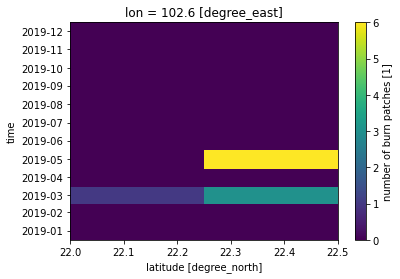

In [17]:
number_of_patches_vs_time =  ds.number_of_patches.sel(lat=slice(*latbounds), lon=slice(*lonbounds))
number_of_patches_vs_time.plot()

In [113]:
burned_area_in_vegetation_class_vs_time =  ds.burned_area_in_vegetation_class.sel(lat=slice(*latbounds), lon=slice(*lonbounds))



(array([419.,   5.,   2.,   3.,   1.,   0.,   0.,   0.,   0.,   2.]),
 array([      0.,  311255.,  622510.,  933765., 1245020., 1556275.,
        1867530., 2178785., 2490040., 2801295., 3112550.], dtype=float32),
 <BarContainer object of 10 artists>)

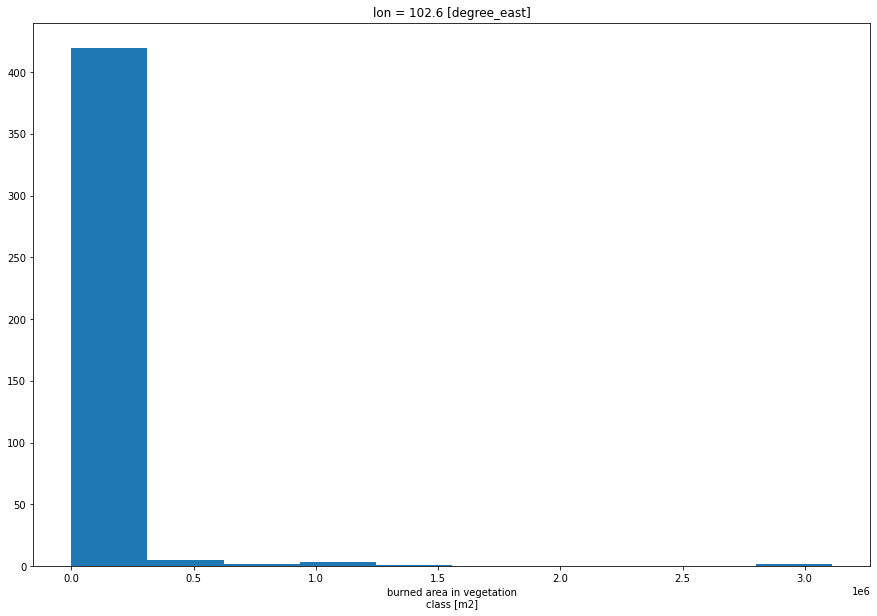

In [109]:
plt.figure(figsize = (15,10))
burned_area_in_vegetation_class_vs_time.plot()

In [112]:
df = burned_area_in_vegetation_class_vs_time.to_dataframe()
df[df>2500000].count()

burned_area_in_vegetation_class    2
dtype: int64

In [29]:
burned_area_in_vegetation_class_vs_time.values.max()

3112550.0

In [33]:
burned_area_in_vegetation_class_vs_time.values.mean()

35527.98

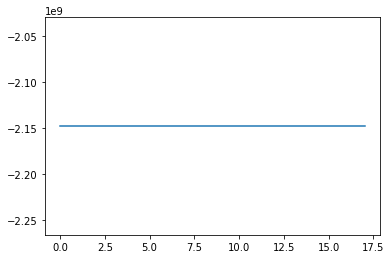